In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

# 根据打印出的文件路径，将文件读取进内存
sample_submission = pd.read_csv('D:/CodeLibrary/data/california-house-prices/sample_submission.csv')
train_data = pd.read_csv('D:/CodeLibrary/data/california-house-prices/train.csv')
test_data = pd.read_csv('D:/CodeLibrary/data/california-house-prices/test.csv')

print(sample_submission.shape)
print(train_data.shape)
print(test_data.shape)

(31626, 2)
(47439, 41)
(31626, 40)


In [2]:
# 我们先来粗略看一下数据集包含哪些特征，head方法可以查看前五行数据
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [3]:
test_data.head()

,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,47439,3034 N Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,NaN,NaN,2020-11-06,799900.0,2020-07-01,819000.0,Dodgertown,90090,CA
1,47440,565 Kenilworth Ave,duplex fixer. Input for comps only,SingleFamily,1924.0,Natural Gas,None,Detached,10018.8,3,...,Detached,521977.0,7494.0,2014-04-04,479950.0,2020-11-03,15000.0,San Leandro,94577,CA
2,47441,3028 N Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,NaN,NaN,2020-11-12,839900.0,NaN,NaN,Los Angeles,90039,CA
3,47442,3022 N North Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,442800.0,5370.0,2020-11-06,809900.0,2020-09-21,810000.0,Dodgertown,90090,CA
4,47443,2515 Admiral Cir,"This beautiful, spacious home built in 2017 is...",SingleFamily,2017.0,Forced Air,Central Air,"Garage Door Opener, Attached",2613.6,4,...,"Garage Door Opener, Attached",965282.0,12912.0,2020-12-02,1095000.0,2019-12-27,1041000.0,Hayward,94545,CA


In [5]:
all_features=pd.concat((train_data.loc[:,train_data.columns!='Sold Price'],test_data.iloc[:,1:]))
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79065 entries, 0 to 31625
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  float64
 1   Address                      79065 non-null  object 
 2   Summary                      78226 non-null  object 
 3   Type                         79065 non-null  object 
 4   Year built                   77123 non-null  float64
 5   Heating                      67552 non-null  object 
 6   Cooling                      63956 non-null  object 
 7   Parking                      77389 non-null  object 
 8   Lot                          56076 non-null  float64
 9   Bedrooms                     74467 non-null  object 
 10  Bathrooms                    73655 non-null  float64
 11  Full bathrooms               66137 non-null  float64
 12  Total interior livable area  75187 non-null  float64
 13  Total spaces    

In [6]:
#将所有缺失的值替换为相应特征的平均值，通过将特征重新缩放到零均值和单位方差来标准化数据
numeric_features=all_features.dtypes[all_features.dtypes!='object'].index
all_features[numeric_features]=all_features[numeric_features].apply(
    lambda x:(x-x.mean())/(x.std())
)
all_features[numeric_features]=all_features[numeric_features].fillna(0)

In [7]:
#太吃内存。。
# all_features=pd.get_dummies(all_features,dummy_na=True)
# all_features.shape
all_features=all_features[numeric_features[1:]]
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79065 entries, 0 to 31625
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year built                   79065 non-null  float64
 1   Lot                          79065 non-null  float64
 2   Bathrooms                    79065 non-null  float64
 3   Full bathrooms               79065 non-null  float64
 4   Total interior livable area  79065 non-null  float64
 5   Total spaces                 79065 non-null  float64
 6   Garage spaces                79065 non-null  float64
 7   Elementary School Score      79065 non-null  float64
 8   Elementary School Distance   79065 non-null  float64
 9   Middle School Score          79065 non-null  float64
 10  Middle School Distance       79065 non-null  float64
 11  High School Score            79065 non-null  float64
 12  High School Distance         79065 non-null  float64
 13  Tax assessed val

In [8]:
import torch

# 从pandas格式中提取NumPy格式，并将其转换为张量表示
n_train=train_data.shape[0]
train_features=torch.tensor(all_features[:n_train].values,dtype=torch.float32)
test_features=torch.tensor(all_features[n_train:].values,dtype=torch.float32)
train_labels=torch.tensor(train_data['Sold Price'].values.reshape(-1,1),dtype=torch.float32)

In [9]:
#定义模型和损失函数
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features, 1))
    return net

In [10]:
# 我们更关心相对误差，解决这个问题的一种方法是用价格预测的对数来衡量差异
def log_rmse(net,features,labels):
    clipped_preds=torch.clamp(net(features),1,float('inf'))
    rmse=torch.sqrt(loss(torch.log(clipped_preds),torch.log(labels)))
    return rmse.item()

In [11]:
# 我们的训练函数将借助Adam优化器
def train(net,train_features,train_labels,test_features,test_labels,num_epochs,lr,weight_decay,batch_size):
    train_ls,test_ls=[],[]
    train_iter=d2l.load_array((train_features,train_labels),batch_size)
    optimizer=torch.optim.Adam(net.parameters(),lr=lr,weight_decay=weight_decay)
 
    for epoch in range(num_epochs):
        for x,y in train_iter:
            optimizer.zero_grad()
            l=loss(net(x),y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [12]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [13]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

fold 1, train log rmse 8.094687, valid log rmse 7.945475
fold 2, train log rmse 7.955968, valid log rmse 8.301177
2-折验证: 平均训练log rmse: 8.025328, 平均验证log rmse: 8.123326


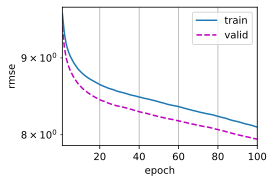

In [15]:
k, num_epochs, lr, weight_decay, batch_size = 2, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [16]:
sample_submission.head()

,Id,Sold Price
0,47439,0
1,47440,0
2,47441,0
3,47442,0
4,47443,0


In [17]:
# 提交你的Kaggle预测
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    # 删去利用d2l画图的代码
    print(f'train log rmse {float(train_ls[-1]):f}')
    preds = net(test_features).detach().numpy()
    # 不出所料，列名需要做替换
    test_data['Sold Price'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
    submission.to_csv('submission.csv', index=False)
    # 最后返回一下提交的结果，以便查看
    return submission

submission = train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

train log rmse 7.333823


In [18]:
# 查看一下预测结果，以确保格式与样例一致
submission.head()

,Id,Sold Price
0,47439,968409.12500
1,47440,88084.65625
2,47441,955954.06250
3,47442,885366.18750
4,47443,317213.93750
